<a href="https://colab.research.google.com/github/IsidroJ/Colab_Archivos_Clase_PADP/blob/main/Pr%C3%A1ctica_23_Regresi%C3%B3n_Ridge_y_Lasso_IJGH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Instrucciones y Objetivos para la Práctica: Regresión Lasso y Ridge**

#### **📌 Objetivos de la Práctica:**  
Al finalizar esta práctica, los estudiantes serán capaces de:  
1. **Realizar un Análisis Exploratorio de Datos (EDA)** completo, incluyendo visualización de distribuciones, detección de outliers y análisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
3. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
4. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.  

---

### **📋 Instrucciones**  

#### **🔹 Paso 1: Configuración Inicial**
✅ Carga el set de datos que puedes encontrar en el campus virtual
✅ Ejecutar las celdas de importación de librerías y carga del dataset.  
✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.  

#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  
📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.    

#### **🔹 Paso 3: Matriz de Correlación**  
✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  
📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)? (salida del dataset)  

#### **🔹 Paso 4: Preprocesamiento**  
🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.  

#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?  
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?  

#### **🔹 Paso 6: Verificación de Supuestos**  
📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad**
4. **Multicolinealidad** (VIF > 10 indica problema).  

📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos?  
- Si hay heterocedasticidad, ¿cómo podría solucionarse?  

#### **🔹 Paso 7: Comparación Final**  
📊 **Analizar:**  
- ¿Qué modelo es más interpretable?  
- ¿Cuál reduce mejor el sobreajuste?  
- ¿Qué variables son más importantes en cada caso?  

---

### **📌 Entrega de la Práctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  

🎯 **Criterios de Evaluación:**  
✔ **Correcto preprocesamiento** (manejo de nulos, escalado, encoding).  
✔ **Análisis visual y estadístico** (gráficos claros, interpretación de resultados).  
✔ **Validación de supuestos** (justificación de si se cumplen o no).  
✔ **Comparación crítica** entre Lasso y Rid

#### **🔹 Paso 1: Configuración Inicial**
✅ Carga el set de datos que puedes encontrar en el campus virtual
✅ Ejecutar las celdas de importación de librerías y carga del dataset.  
✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.

In [1]:
# Librerias
from IPython.display import display, HTML
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
import numpy as np
from sklearn.linear_model import Ridge
import statsmodels.api as sm
import scipy.stats as stats


In [2]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Cargar el Dataset </h3>"))

display(HTML("<h3 style='color:blue; font-size:14px;'> Primeras filas del Dataset </h3>"))

df = pd.read_csv('/content/drive/MyDrive/1_ClassFiles/19_Clase 17-10-2025/insurance.csv')
print(df.head())
print('\n')

display(HTML("<h3 style='color:blue; font-size:14px;'> Transformar las variables object a category del Dataset </h3>"))
# Convertir automáticamente todas las columnas object a category
for col in df.select_dtypes(include="object"):
    df[col] = df[col].astype("category")
print(df.dtypes)

print('\n')

display(HTML("<h3 style='color:blue; font-size:14px;'> Información del Dataset </h3>"))
print(df.info())
print('\n')

display(HTML("<h3 style='color:blue; font-size:14px;'> Estadísticas descriptivas del Dataset </h3>"))
print(df.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520




age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB
None




               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  
📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.  

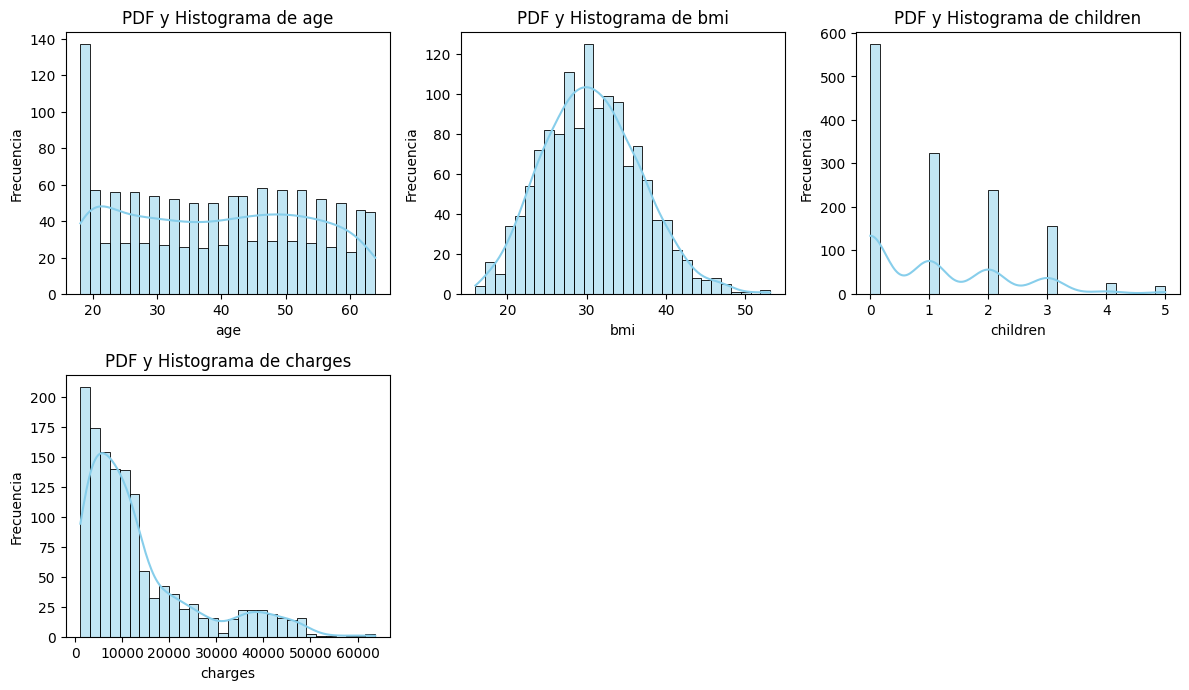

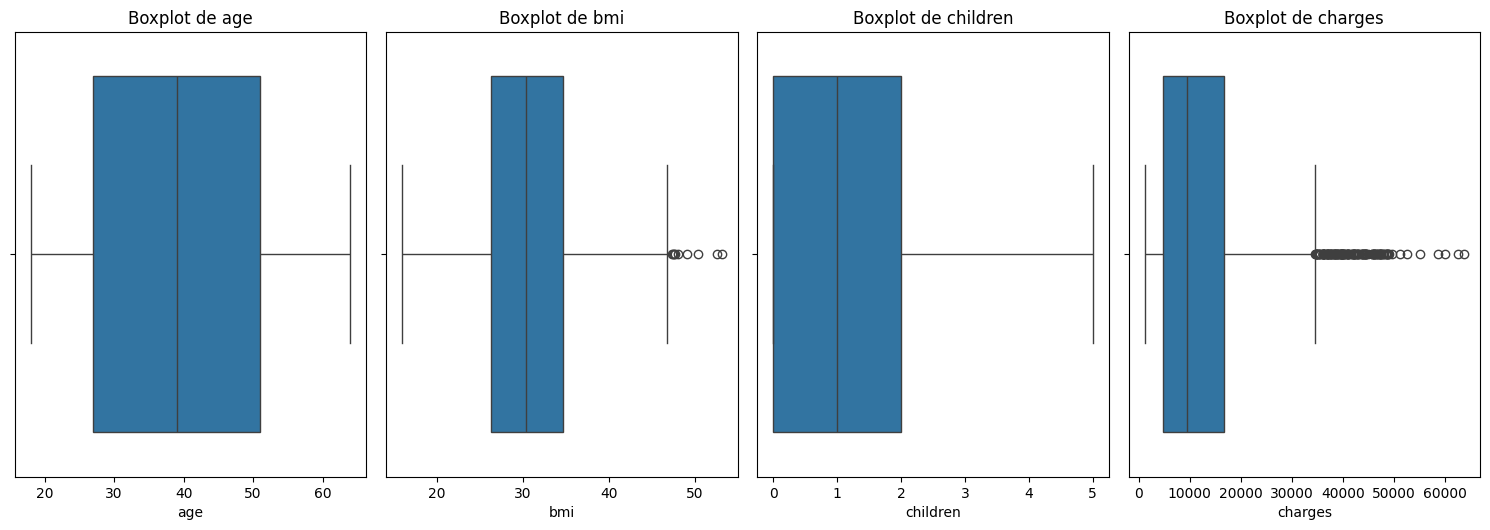

In [3]:
display(HTML("<h3 style='color:blue; font-size:14px;'> Histogramas de variables numéricas del Dataset </h3>"))

colum_num = df.select_dtypes(include=['float64', 'int64']).columns
# print(columnas)

# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(12, 10))
for i, col in enumerate(colum_num, 1):
    plt.subplot(3, 3, i)  # Ajustar la cantidad de subgráficos según el número de columnas
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

print('\n')

display(HTML("<h3 style='color:blue; font-size:14px;'> Boxplots de variables numéricas del Dataset </h3>"))
plt.figure(figsize=(15, 10))
for i, col in enumerate(colum_num, 1):
    plt.subplot(2, 4, i)  # 2 filas, 4 columnas de subplots
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

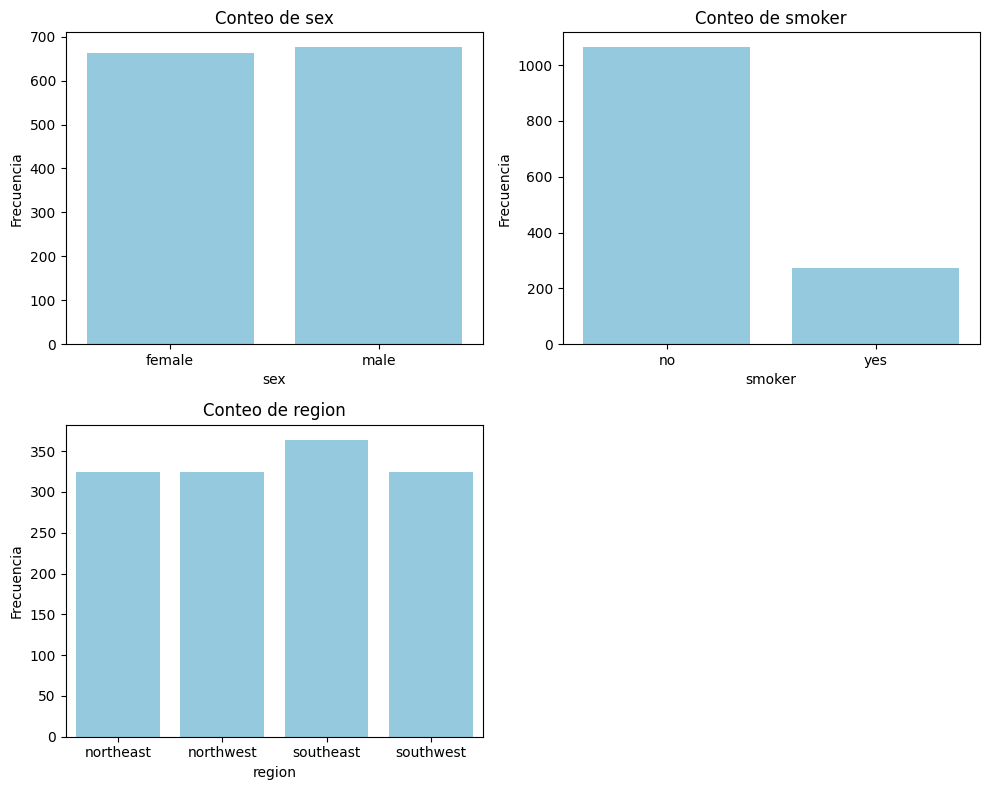

In [4]:
display(HTML("<h3 style='color:blue; font-size:14px;'> Gráficos de barras para variables categóricas del Dataset </h3>"))


colum_cat = df.select_dtypes(include=['category']).columns
#print(colum_cat)
print('\n')

# Crear los gráficos de de barras
plt.figure(figsize=(10, 8))
for i, col in enumerate(colum_cat, 1):
    plt.subplot(2, 2, i) # Create subplots
    values = df[col].value_counts() # Get value counts for each category
    ax = sns.barplot(x=values.index, y=values.values, color='skyblue') # Use sns.barplot with axis object
    plt.title(f'Conteo de {col}', fontsize=12) # Correct title
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

#### **🔹 Paso 3: Matriz de Correlación**  
✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  
📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)? (salida del dataset)  


In [5]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Matriz de correlación </h3>"))

corr = df[colum_num].corr()
print(corr.round(4))

             age     bmi  children  charges
age       1.0000  0.1093    0.0425   0.2990
bmi       0.1093  1.0000    0.0128   0.1983
children  0.0425  0.0128    1.0000   0.0680
charges   0.2990  0.1983    0.0680   1.0000


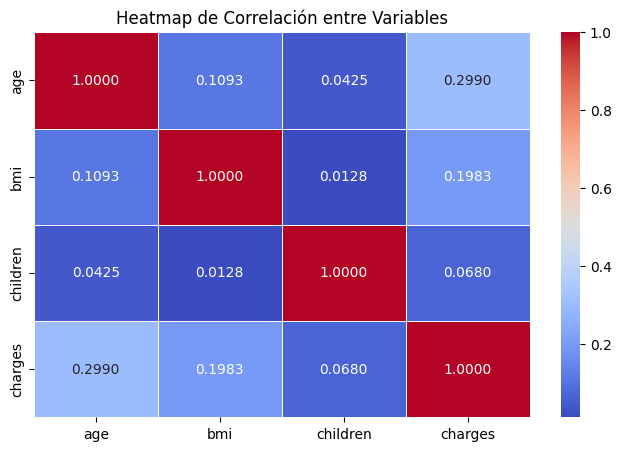

In [6]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Heatmap de correlación entre todas las variables </h3>"))

# 5. Heatmap de correlación entre todas las variables
plt.figure(figsize=(8, 5))
correlation_matrix = df[colum_num].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f', cbar=True, linewidths=0.5)
plt.title("Heatmap de Correlación entre Variables")
plt.show()

**¿Qué variables están más correlacionadas con el target (charges)? (salida del dataset)**

Las varibles Edad (age) y Índice de Masa Corporal (bmi) son las que tiene mayor correlación con la variable de estudio (charges), los valores de la correlación son: 0.2990 y 0.1983, respectivamente. La variable que no tiene una correlación significativa es children.

#### **🔹 Paso 4: Preprocesamiento**  
🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.

In [7]:
# Seleccionar las características relevantes para el modelo
features = ["age", "bmi", "children", "sex", "smoker", "region"]
target = "charges"
df = df[features + [target]].copy()
print(df)


      age     bmi  children     sex smoker     region      charges
0      19  27.900         0  female    yes  southwest  16884.92400
1      18  33.770         1    male     no  southeast   1725.55230
2      28  33.000         3    male     no  southeast   4449.46200
3      33  22.705         0    male     no  northwest  21984.47061
4      32  28.880         0    male     no  northwest   3866.85520
...   ...     ...       ...     ...    ...        ...          ...
1333   50  30.970         3    male     no  northwest  10600.54830
1334   18  31.920         0  female     no  northeast   2205.98080
1335   18  36.850         0  female     no  southeast   1629.83350
1336   21  25.800         0  female     no  southwest   2007.94500
1337   61  29.070         0  female    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [8]:
# Separar las características en numéricas y categóricas
numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]


In [9]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Codificar variables categóricas con OneHotEncoder </h3>"))
display(HTML("<h3 style='color:blue; font-size:18px;'> Estandarizar variables numéricas con StandardScaler </h3>"))

print('\n')

# Crear un preprocesador para escalar las variables numéricas y codificar las categóricas
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),  # Normaliza las variables numéricas
    ("cat", OneHotEncoder(drop='first'), categorical_features)  # Convierte categóricas a variables dummy
])

print(preprocessor)




ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'bmi', 'children']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['sex', 'smoker', 'region'])])


In [10]:
# Definir el parámetro de regularización (alpha)
# Se puede ajustar con validación cruzada para optimizar el rendimiento

alpha = 0.1  # Controla la penalización sobre los coeficientes

# Crear un pipeline que primero preprocesa los datos y luego aplica regresión Lasso
lasso = Pipeline([
    ("preprocessor", preprocessor),
    ("lasso", Lasso(alpha=alpha))
])

#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?  
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?  

In [11]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Regresión Lasso </h3>"))

display(HTML("<h3 style='color:blue; font-size:18px;'> Ajustar el modelo con los hiperparámetros dados (alpha=0.1 para Lasso) </h3>"))
# Definir el parámetro de regularización (alpha)

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df[features]
y = df[target]

# Entrenar el modelo Lasso con los datos
lasso.fit(X, y)

# Obtener los coeficientes después del ajuste
feature_names = numeric_features + list(lasso.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out())
coef = pd.Series(lasso.named_steps["lasso"].coef_, index=feature_names)
print(f"\nCoeficientes estimados:\n{coef}")

coefficients = lasso.named_steps["lasso"].coef_
intercept = lasso.named_steps["lasso"].intercept_

print(f"Término independiente estimado: {intercept:.4f}")

print('\n')
equation = f"Charges = {intercept:.4f} "
for i, coef in enumerate(coefficients):
  equation += f"+ ({coef:.4f} * {feature_names[i]}) "

print(equation) #se obtiene el modelo con los coeficientes



Coeficientes estimados:
age                  3607.401538
bmi                  2067.477362
children              572.886518
sex_male             -130.858174
smoker_yes          23847.874359
region_northwest     -351.296712
region_southeast    -1033.232029
region_southwest     -958.345589
dtype: float64
Término independiente estimado: 9052.0910


Charges = 9052.0910 + (3607.4015 * age) + (2067.4774 * bmi) + (572.8865 * children) + (-130.8582 * sex_male) + (23847.8744 * smoker_yes) + (-351.2967 * region_northwest) + (-1033.2320 * region_southeast) + (-958.3456 * region_southwest) 


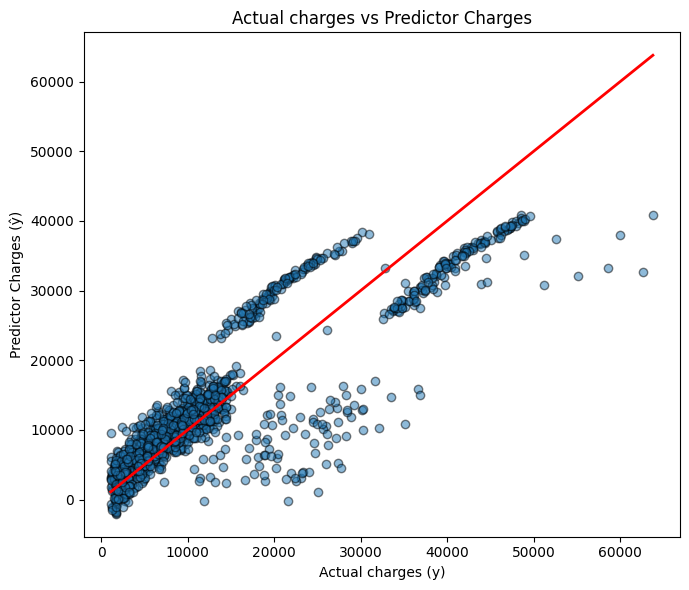

In [12]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Visualización de predicciones: Charges actual vs. Predictor charges </h3>"))

# Predictions with the same scaling
y_pred_ls = lasso.predict(X)

df_pred_ls = pd.DataFrame({"y_pred": y_pred_ls})
df_pred_ls.to_excel("/content/drive/MyDrive/1_ClassFiles/19_Clase 17-10-2025/y_pred_ls.xlsx", index=False)

# 1. Scatter plot between actual and predicted values
plt.figure(figsize=(7, 6))
plt.scatter(y, y_pred_ls, alpha=0.5, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='-', linewidth=2, label='Ideal line: y = ŷ')
plt.title("Actual charges vs Predictor Charges")
plt.xlabel("Actual charges (y)")
plt.ylabel("Predictor Charges (ŷ)")
plt.tight_layout()
plt.show()

In [13]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Medidas de rendimiento Lasso </h3>"))

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluación del modelo con métricas de desempeño
#y_pred_ls = lasso.predict(X)
MSE_ls = mean_squared_error(y, y_pred_ls)  # Error cuadrático medio
RMSE_ls = np.sqrt(MSE_ls)  # Raíz del error cuadrático medio
MAE_ls = mean_absolute_error(y, y_pred_ls)  # Error absoluto medio
R2_ls = r2_score(y, y_pred_ls)  # Coeficiente de determinación
n_nonzero_coef = np.sum(coef != 0)  # Número de coeficientes distintos de cero

# Imprimir los resultados de las métricas
print("Evaluación del modelo Lasso:")
print(f"MSE: {MSE_ls:.2f}")
print(f"RMSE: {RMSE_ls:.2f}")
print(f"MAE: {MAE_ls:.2f}")
print(f"R^2: {R2_ls:.4f}")
print(f"Número de coeficientes no nulos: {n_nonzero_coef}")

Evaluación del modelo Lasso:
MSE: 36501893.68
RMSE: 6041.68
MAE: 4170.90
R^2: 0.7509
Número de coeficientes no nulos: 1


In [14]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Regresión Ridge </h3>"))

print('\n')

# Seleccionar las características relevantes para el modelo
features_rdg = ["age", "bmi", "children", "sex", "smoker", "region"]
target_rdg = "charges"
df_rdg = df[features_rdg + [target_rdg]].copy()
print(df_rdg)

print('\n')

# Separar las características en numéricas y categóricas
numeric_features_rdg = ["age", "bmi", "children"]
categorical_features_rdg = ["sex", "smoker", "region"]




      age     bmi  children     sex smoker     region      charges
0      19  27.900         0  female    yes  southwest  16884.92400
1      18  33.770         1    male     no  southeast   1725.55230
2      28  33.000         3    male     no  southeast   4449.46200
3      33  22.705         0    male     no  northwest  21984.47061
4      32  28.880         0    male     no  northwest   3866.85520
...   ...     ...       ...     ...    ...        ...          ...
1333   50  30.970         3    male     no  northwest  10600.54830
1334   18  31.920         0  female     no  northeast   2205.98080
1335   18  36.850         0  female     no  southeast   1629.83350
1336   21  25.800         0  female     no  southwest   2007.94500
1337   61  29.070         0  female    yes  northwest  29141.36030

[1338 rows x 7 columns]




In [15]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Ajustar el modelo con los hiperparámetros dados (alpha=1.0 para Ridge) </h3>"))

# Crear un preprocesador para escalar las variables numéricas y codificar las categóricas
preprocessor_rdg = ColumnTransformer([
    ("num", StandardScaler(), numeric_features_rdg),  # Normaliza las variables numéricas
    ("cat", OneHotEncoder(drop='first'), categorical_features_rdg)  # Convierte categóricas a variables dummy
])


# Definir un valor fijo de alpha
alpha_rdg = 1.0

# Crear un pipeline con Ridge
ridge = Pipeline([
    ("preprocessor", preprocessor_rdg),
    ("ridge", Ridge(alpha=alpha_rdg))
])

In [16]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Modelo de regresión Ridge </h3>"))
# Separar las variables predictoras (X) y la variable objetivo (y)
X = df[features_rdg]
y = df[target_rdg]

# Entrenar el modelo Ridge
ridge.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('ridge', Ridge())])

In [17]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Modelo Ridge </h3>"))

# Obtener los coeficientes después del ajuste
feature_names_rdg = numeric_features_rdg + list(ridge.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out())
coef_rdg = pd.Series(ridge.named_steps["ridge"].coef_, index=feature_names_rdg)
print(f"\nCoeficientes estimados:\n{coef_rdg}")

coefficients = ridge.named_steps["ridge"].coef_
intercept = ridge.named_steps["ridge"].intercept_

print(f"Término independiente estimado: {intercept:.4f}")


equation = f"charges = {intercept:.4f} " + " ".join(
    [f"+ ({c:.4f} * {n})" for n, c in zip(feature_names_rdg, coef_rdg)]
)
print("\nEcuación del modelo:")
print(equation)


Coeficientes estimados:
age                  3604.096982
bmi                  2064.858647
children              573.073125
sex_male             -124.200613
smoker_yes          23737.991359
region_northwest     -347.825073
region_southeast    -1018.540799
region_southwest     -952.384021
dtype: float64
Término independiente estimado: 9064.9415

Ecuación del modelo:
charges = 9064.9415 + (3604.0970 * age) + (2064.8586 * bmi) + (573.0731 * children) + (-124.2006 * sex_male) + (23737.9914 * smoker_yes) + (-347.8251 * region_northwest) + (-1018.5408 * region_southeast) + (-952.3840 * region_southwest)


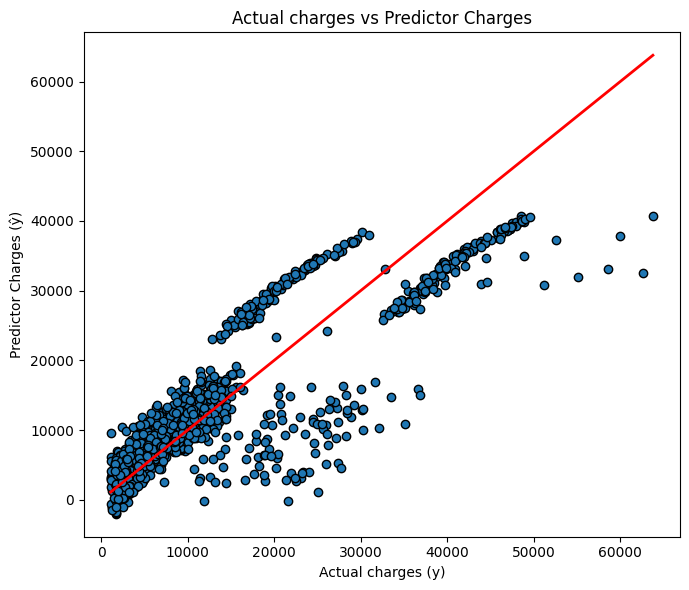

In [18]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Visualización de predicciones: Charges actual vs. Predictor charges </h3>"))

# Predictions with the same scaling
y_pred_rdg = ridge.predict(X)

df_pred_rdg = pd.DataFrame({"y_pred": y_pred_rdg})
df_pred_rdg.to_excel("/content/drive/MyDrive/1_ClassFiles/19_Clase 17-10-2025/y_pred_rdg.xlsx", index=False)

# 1. Scatter plot between actual and predicted values
plt.figure(figsize=(7, 6))
plt.scatter(x=y, y=y_pred_rdg, alpha=1, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='-', linewidth=2, label='Ideal line: y = ŷ')
plt.title("Actual charges vs Predictor Charges")
plt.xlabel("Actual charges (y)")
plt.ylabel("Predictor Charges (ŷ)")
plt.tight_layout()
plt.show()

In [19]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Medidas de rendimiento Ridge </h3>"))

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluación del modelo con métricas de desempeño
#y_pred_rdg = ridge.predict(X)
MSE_rdg = mean_squared_error(y, y_pred_rdg)  # Error cuadrático medio
RMSE_rdg = np.sqrt(MSE_rdg)  # Raíz del error cuadrático medio
MAE_rdg = mean_absolute_error(y, y_pred_rdg)  # Error absoluto medio
R2_rdg = r2_score(y, y_pred_rdg)  # Coeficiente de determinación
n_nonzero_coef_rdg = np.sum(coef != 0)  # Número de coeficientes distintos de cero

# Imprimir los resultados de las métricas
print("Evaluación del modelo Ridge:")
print(f"MSE: {MSE_rdg:.2f}")
print(f"RMSE: {RMSE_rdg:.2f}")
print(f"MAE: {MAE_rdg:.2f}")
print(f"R^2: {R2_rdg:.4f}")
print(f"Número de coeficientes no nulos: {n_nonzero_coef_rdg}")

Evaluación del modelo Ridge:
MSE: 36503887.63
RMSE: 6041.84
MAE: 4178.37
R^2: 0.7509
Número de coeficientes no nulos: 1


### **¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?**

En ambos casos da el mismo valor de R²

### **¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?**

El valor más cercano a cero es del coeficiente de ex_male con un valor de -130.858174, significa que no es una varible que influya significativamente en Charger.


#### **🔹 Paso 6: Verificación de Supuestos**  
📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad**
4. **Multicolinealidad** (VIF > 10 indica problema).  

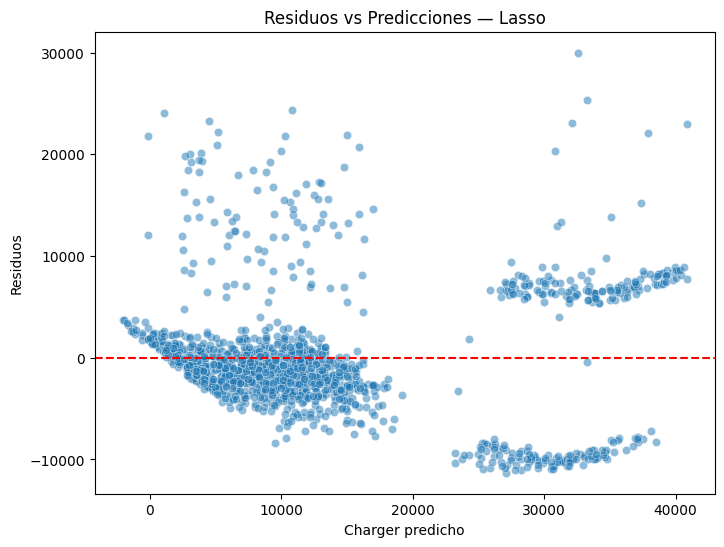

In [20]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Linealidad (gráfico de residuos vs predicciones) Modelo Lasso </h3>"))

y_pred_ls = lasso.predict(X)
residuals_ls = y - y_pred_ls

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_ls, y=residuals_ls, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Charger predicho")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicciones — Lasso")
plt.show()

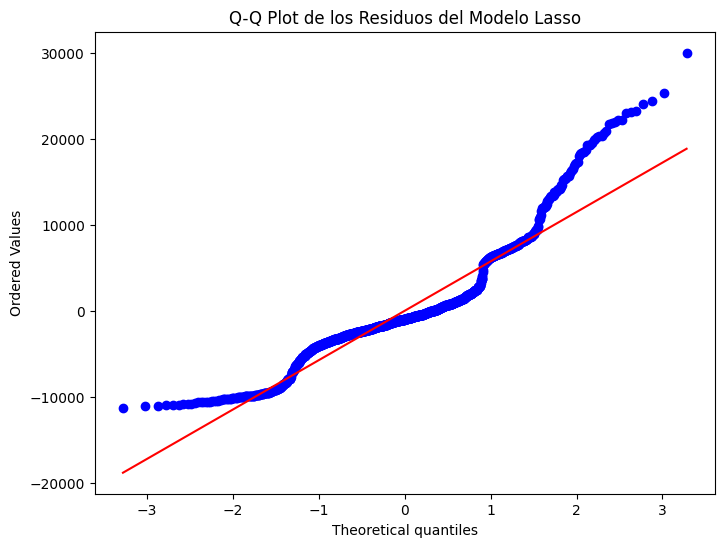

Media: -0.000, Desviación estándar: 6043.939
Shapiro–Wilk: estadístico = 0.89893, p-valor = 0.00000
D’Agostino–Pearson: estadístico = 300.38962, p-valor = 0.00000
Kolmogorov–Smirnov: estadístico = 0.16081, p-valor = 0.00000




In [21]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Q-Q Plot para evaluar la normalidad de residuos — Lasso </h3>"))

plt.figure(figsize=(8, 6))
stats.probplot(residuals_ls, dist="norm", plot=plt)
plt.title("Q-Q Plot de los Residuos del Modelo Lasso")
plt.show()

print('\n')

display(HTML("<h3 style='color:blue; font-size:18px;'> Pruebas de normalidad para los residuos del modelo Lasso </h3>"))

# Pruebas de normalidad
print(f"Media: {residuals_ls.mean():.3f}, Desviación estándar: {residuals_ls.std():.3f}")

# Shapiro–Wilk
shapiro_test_ls = stats.shapiro(residuals_ls)
print(f"Shapiro–Wilk: estadístico = {shapiro_test_ls.statistic:.5f}, p-valor = {shapiro_test_ls.pvalue:.5f}")

# D’Agostino–Pearson
dagostino_test_ls = stats.normaltest(residuals_ls)
print(f"D’Agostino–Pearson: estadístico = {dagostino_test_ls.statistic:.5f}, p-valor = {dagostino_test_ls.pvalue:.5f}")

# Kolmogorov–Smirnov (con parámetros estimados)
z = (residuals_ls - residuals_ls.mean()) / residuals_ls.std(ddof=1)
ks_test_ls = stats.kstest(z, 'norm')
print(f"Kolmogorov–Smirnov: estadístico = {ks_test_ls.statistic:.5f}, p-valor = {ks_test_ls.pvalue:.5f}")

print('\n')

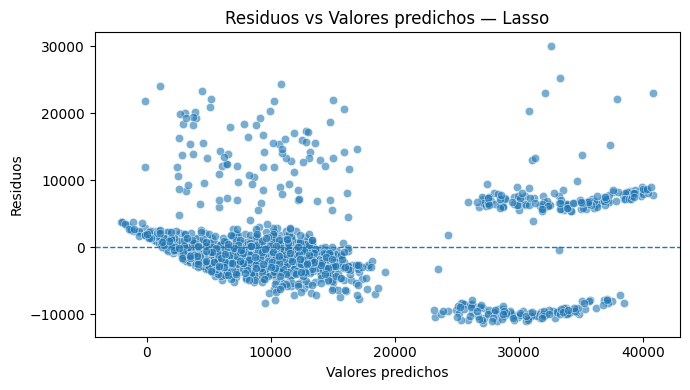

Breusch–Pagan p-value: 1.443e-22  ->  Heterocedasticidad
White test p-value:    9.947e-15  ->  Heterocedasticidad
Durbin–Watson: 2.088 (≈2 sugiere independencia; <2 autocorrelación positiva)


In [22]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Homocedasticidad modelo Lasso </h3>"))

# Matriz transformada por el preprocesador ya ajustado dentro del pipeline
Xt = lasso.named_steps["preprocessor"].transform(X)
# Convertir a denso si es sparse
try:
    from scipy import sparse
    if sparse.issparse(Xt):
        Xt = Xt.toarray()
except Exception:
    pass

plt.figure(figsize=(7,4))
sns.scatterplot(x=y_pred_ls, y=residuals_ls, alpha=0.6)
plt.axhline(0, linestyle='--', linewidth=1)
plt.title("Residuos vs Valores predichos — Lasso")
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.tight_layout()
plt.show()

from statsmodels.stats.api import het_breuschpagan, het_white, durbin_watson
import statsmodels.api as sm

exog = sm.add_constant(Xt, has_constant="add")

bp_stat, bp_pvalue, _, _   = het_breuschpagan(residuals_ls, exog)
white_stat, white_pvalue, _, _ = het_white(residuals_ls, exog)

print(f"Breusch–Pagan p-value: {bp_pvalue:.4g}  ->  "
      f"{'Heterocedasticidad' if bp_pvalue < 0.05 else 'El valor de p es mayor a 0.05; se asume homocedasticidad'}")
print(f"White test p-value:    {white_pvalue:.4g}  ->  "
      f"{'Heterocedasticidad' if white_pvalue < 0.05 else 'El valor de p es mayor a 0.05; se asume homocedasticidad'}")

dw = durbin_watson(residuals_ls)
print(f"Durbin–Watson: {dw:.3f} (≈2 sugiere independencia; <2 autocorrelación positiva)")

In [23]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Cálculo de VIF (Multicolinealidad) — Modelo Lasso </h3>"))


from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1) Misma X transformada que usa el pipeline Lasso
Xt = lasso.named_steps["preprocessor"].transform(X)
if sparse.issparse(Xt):
    Xt = Xt.toarray()

# 2) DataFrame con nombres correctos
feat_names = lasso.named_steps["preprocessor"].get_feature_names_out()
X_transformed_df = pd.DataFrame(Xt, columns=feat_names, index=X.index)

# 3) (Silencioso) quitar columnas de varianza cero para evitar VIF infinito
zero_var_cols = X_transformed_df.columns[X_transformed_df.std(ddof=0) == 0]
if len(zero_var_cols) > 0:
    X_transformed_df = X_transformed_df.drop(columns=zero_var_cols)

# 4) Agregar constante y calcular VIF (excluye la constante)
X_with_const = sm.add_constant(X_transformed_df, has_constant="add")

vif_rows = []
for i, col in enumerate(X_with_const.columns):
    if col == "const":
        continue
    vif_val = variance_inflation_factor(X_with_const.values, i)
    vif_rows.append({"Variable": col, "VIF": float(vif_val)})

vif_data = pd.DataFrame(vif_rows).sort_values("VIF", ascending=False).reset_index(drop=True)
print("\n### Análisis de Multicolinealidad (VIF) — Lasso ###")
print(vif_data.round({"VIF": 4}))




### Análisis de Multicolinealidad (VIF) — Lasso ###
                Variable     VIF
0  cat__region_southeast  1.6522
1  cat__region_southwest  1.5294
2  cat__region_northwest  1.5188
3               num__bmi  1.1066
4               num__age  1.0168
5        cat__smoker_yes  1.0121
6          cat__sex_male  1.0089
7          num__children  1.0040


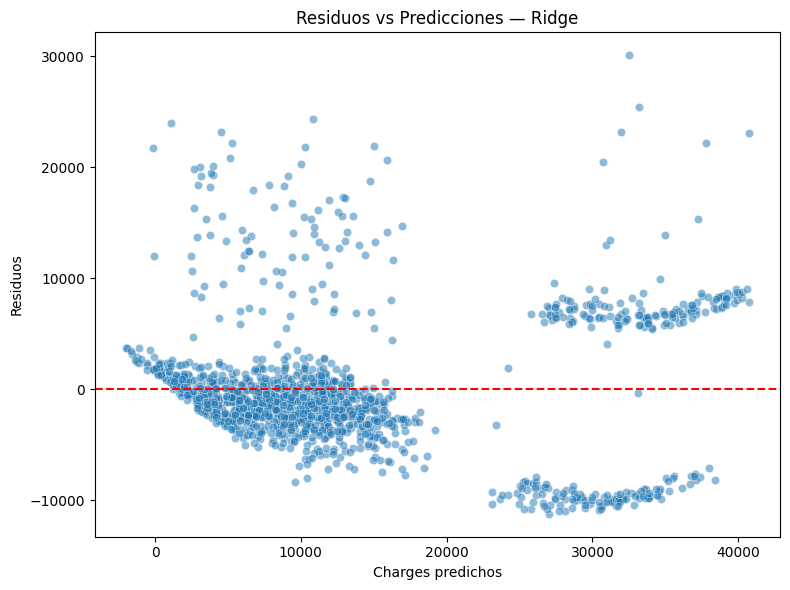

In [24]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Linealidad (gráfico de residuos vs predicciones) Modelo Ridge </h3>"))

# Predicciones y residuos (Ridge)
y_pred_rdg = ridge.predict(X)
residuals_rdg = y - y_pred_rdg

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_rdg, y=residuals_rdg, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Charges predichos")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicciones — Ridge")
plt.tight_layout()
plt.show()

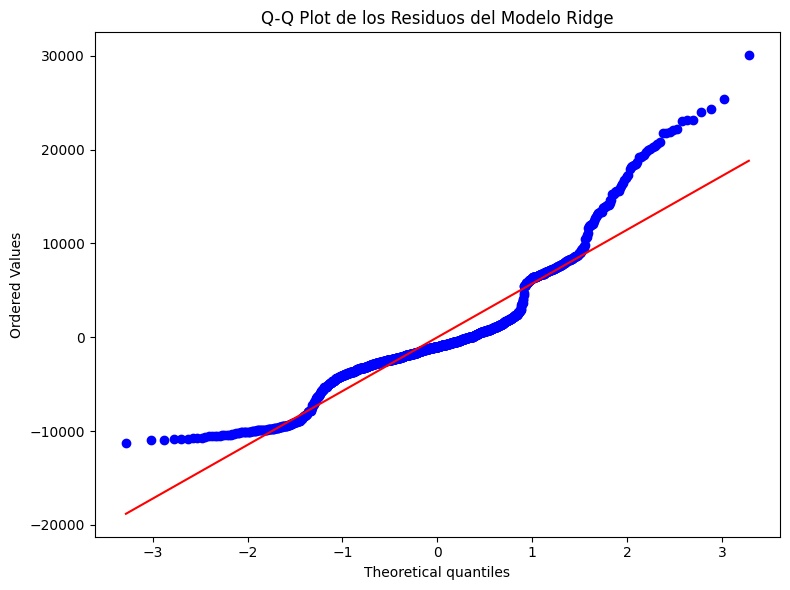

In [25]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Q-Q Plot para evaluar la normalidad de residuos — Ridge </h3>"))

plt.figure(figsize=(8, 6))
stats.probplot(residuals_rdg, dist="norm", plot=plt)
plt.title("Q-Q Plot de los Residuos del Modelo Ridge")
plt.tight_layout()
plt.show()

In [26]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Pruebas de normalidad para los residuos del modelo Ridge </h3>"))

print(f"Media: {residuals_rdg.mean():.3f}, Desviación estándar: {residuals_rdg.std():.3f}")

# Shapiro–Wilk (adecuado para n <= ~5000)
shapiro_test_rdg = stats.shapiro(residuals_rdg)
print(f"Shapiro–Wilk: estadístico = {shapiro_test_rdg.statistic:.5f}, p-valor = {shapiro_test_rdg.pvalue:.5f}")

# D’Agostino–Pearson
dagostino_test_rdg = stats.normaltest(residuals_rdg)
print(f"D’Agostino–Pearson: estadístico = {dagostino_test_rdg.statistic:.5f}, p-valor = {dagostino_test_rdg.pvalue:.5f}")

# Kolmogorov–Smirnov (aprox., usando z estandarizado)
z = (residuals_rdg - residuals_rdg.mean()) / residuals_rdg.std(ddof=1)
ks_test_rdg = stats.kstest(z, 'norm')
print(f"Kolmogorov–Smirnov: estadístico = {ks_test_rdg.statistic:.5f}, p-valor = {ks_test_rdg.pvalue:.5f}")


Media: 0.000, Desviación estándar: 6044.104
Shapiro–Wilk: estadístico = 0.89800, p-valor = 0.00000
D’Agostino–Pearson: estadístico = 303.54379, p-valor = 0.00000
Kolmogorov–Smirnov: estadístico = 0.16246, p-valor = 0.00000


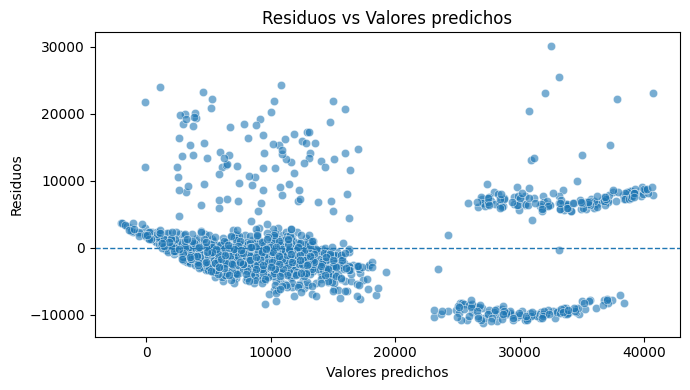

Breusch–Pagan p-value: 1.151e-22  ->  Heterocedasticidad
White test p-value:    9.515e-15  ->  Heterocedasticidad
Durbin–Watson: 2.089 (≈2 sugiere independencia; <2 autocorrelación positiva)


In [27]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Homocedasticidad modelo Ridge </h3>"))

# Usar la MISMA matriz transformada que el modelo (post-preprocesamiento)
from scipy import sparse
Xt = ridge.named_steps["preprocessor"].transform(X)
if sparse.issparse(Xt):
    Xt = Xt.toarray()

plt.figure(figsize=(7,4))
sns.scatterplot(x=y_pred_rdg, y=residuals_rdg, alpha=0.6)
plt.axhline(0, linestyle='--', linewidth=1)
plt.title("Residuos vs Valores predichos")
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.tight_layout()
plt.show()

from statsmodels.stats.api import het_breuschpagan, het_white, durbin_watson
import statsmodels.api as sm

exog = sm.add_constant(Xt, has_constant="add")

bp_stat, bp_pvalue, _, _ = het_breuschpagan(residuals_rdg, exog)
white_stat, white_pvalue, _, _ = het_white(residuals_rdg, exog)

print(f"Breusch–Pagan p-value: {bp_pvalue:.4g}  ->  "
      f"{'Heterocedasticidad' if bp_pvalue < 0.05 else 'El valor de p es mayor a 0.05; se asume homocedasticidad'}")
print(f"White test p-value:    {white_pvalue:.4g}  ->  "
      f"{'Heterocedasticidad' if white_pvalue < 0.05 else 'El valor de p es mayor a 0.05; se asume homocedasticidad'}")

dw = durbin_watson(residuals_rdg)
print(f"Durbin–Watson: {dw:.3f} (≈2 sugiere independencia; <2 autocorrelación positiva)")

In [28]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Cálculo de VIF (Multicolinealidad) — Modelo Ridge </h3>"))

from scipy import sparse
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# 1) Obtener la MISMA X transformada que usó el pipeline
Xt = ridge.named_steps["preprocessor"].transform(X)
if sparse.issparse(Xt):
    Xt = Xt.toarray()

# 2) DataFrame con nombres correctos
feat_names = ridge.named_steps["preprocessor"].get_feature_names_out()
X_transformed_df = pd.DataFrame(Xt, columns=feat_names, index=X.index)

# 3) (Silencioso) quitar columnas de varianza cero para evitar VIF infinito
zero_var_cols = X_transformed_df.columns[X_transformed_df.std(ddof=0) == 0]
if len(zero_var_cols) > 0:
    X_transformed_df = X_transformed_df.drop(columns=zero_var_cols)

# 4) Agregar constante y calcular VIF (excluye la constante)
X_with_const = sm.add_constant(X_transformed_df, has_constant="add")

vif_rows = []
for i, col in enumerate(X_with_const.columns):
    if col == "const":
        continue
    vif_val = variance_inflation_factor(X_with_const.values, i)
    vif_rows.append({"Variable": col, "VIF": float(vif_val)})

vif_data = pd.DataFrame(vif_rows).sort_values("VIF", ascending=False).reset_index(drop=True)
print("\n### Análisis de Multicolinealidad (VIF) — Ridge ###")
print(vif_data.round({"VIF": 4}))


### Análisis de Multicolinealidad (VIF) — Ridge ###
                Variable     VIF
0  cat__region_southeast  1.6522
1  cat__region_southwest  1.5294
2  cat__region_northwest  1.5188
3               num__bmi  1.1066
4               num__age  1.0168
5        cat__smoker_yes  1.0121
6          cat__sex_male  1.0089
7          num__children  1.0040


**¿Se cumplen los supuestos en ambos modelos?**
* En ambos modelos la linealidad que se presenta en el diagrama de residuos-predicción no es es perfecta.
* En ambos modelos la normalidad de residuos no se cumple, los valores de p para Lasso y ridege es p=0.0000.
* En ambos modelos la Homocedasticidad no se cumple, se presenta una clara Heterocedasticidad.
* No hay problema de multicolinealidad en ambos casos.


**Si hay heterocedasticidad, ¿cómo podría solucionarse?**

* La varaible objetivo (charger) se puede transformar usando log o Box-Cox para reducir la asimetría y estabilizar la varianza.

#### **🔹 Paso 7: Comparación Final**  
📊 **Analizar:**  
- ¿Qué modelo es más interpretable?  
- ¿Cuál reduce mejor el sobreajuste?  
- ¿Qué variables son más importantes en cada caso?

**¿Qué modelo es más interpretable?**

Prácticamente no existe una diferencia notable entre ambos modelos, ya que los coeficientes estimados son muy similares. Sería conveniente variar el parámetro α (alpha) en ambos casos para observar si surgen diferencias en la selección de variables o en la magnitud de los coeficientes.

**¿Cuál reduce mejor el sobreajuste?**

En los resultados actuales ambos modelos presentan un valor similar de R², lo que indica un desempeño comparable. No obstante, teóricamente:

* Lasso tiende a reducir el sobreajuste al eliminar variables irrelevantes (selección de características).

* Ridge reduce el sobreajuste suavizando los coeficientes cuando existe colinealidad entre variables.
Por tanto, ambos buscan el mismo objetivo (regularizar el modelo), aunque lo hacen de forma distinta..

**¿Qué variables son más importantes en cada caso?**

En ambos modelos se observa que las variables smoker_yes, age y bmi presentan los coeficientes más altos en magnitud, lo que indica que son las que más influyen en el costo de los seguros (charges). Estas tres variables destacan consistentemente en Lasso y Ridge, confirmando su relevancia en la predicción.
